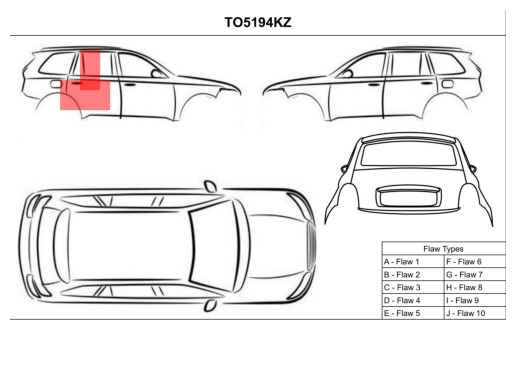

In [10]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

# Load the image
img_path = '../data_extraction/diagrams/jpg_files/TO5194KZ_diagram.pdf-1.jpg'
img = Image.open(img_path)

# Create a drawing context
draw = ImageDraw.Draw(img, 'RGBA')

# Example data: number of flaws in different regions
flaw_data = {
    "front_right_door": 5,
    "tailgate": 5,
    # Add other parts with their corresponding flaw counts here...
}

# Define regions of interest (ROI) with bounding boxes
# Format: (x0, y0, x1, y1)
regions = {
    "front_right_door": (350, 200, 450, 400),
    "tailgate": (250, 350, 500, 500),
    # Add other parts with their corresponding bounding boxes here...
}

# Function to determine the color based on the number of flaws
def get_color(flaw_count):
    # Normalize flaw count to a value between 0 and 255
    color_intensity = int(min(flaw_count * 25.5, 255))
    return (255, 0, 0, color_intensity)  # Red color with varying opacity

# Color the regions based on the flaw data
for part, flaw_count in flaw_data.items():
    if part in regions:
        bbox = regions[part]
        color = get_color(flaw_count)
        draw.rectangle(bbox, fill=color)

# Convert the image to numpy array and plot
img_array = np.array(img)
plt.imshow(img_array)
plt.axis('off')  # Hide axes
plt.show()


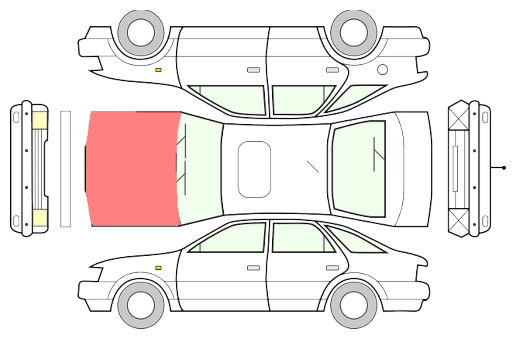

In [14]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import json

# Load the image
img_path = '../../diagram_data.png'
img = Image.open(img_path)

# Load the LabelMe annotations
annotation_path = '../../pngwing.com.json'
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

# Create a drawing context
draw = ImageDraw.Draw(img, 'RGBA')

# Example data: number of flaws in different regions
flaw_data = {
    "bonnet": 5
    # Add other parts with their corresponding flaw counts here...
}

# Function to determine the color based on the number of flaws
def get_color(flaw_count):
    # Normalize flaw count to a value between 0 and 255
    color_intensity = int(min(flaw_count * 25.5, 255))
    return (255, 0, 0, color_intensity)  # Red color with varying opacity

# Color the regions based on the flaw data
for shape in annotations['shapes']:
    part_name = shape['label']
    if part_name in flaw_data:
        polygon = [(int(x), int(y)) for x, y in shape['points']]
        color = get_color(flaw_data[part_name])
        draw.polygon(polygon, fill=color)

# Convert the image to numpy array and plot
img_array = np.array(img)
plt.imshow(img_array)
plt.axis('off')  # Hide axes
plt.show()
